In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# import statistical tools
from scipy import stats
# import data wrangle functions
import wrangle_austin_shelter as w

In [2]:
animals, train, validate, test = w.wrangle_austin_animal_shelter()

reading intake data from local file
reading outcome data from local file


In [3]:
train.shape

(107839, 30)

In [4]:
animals.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,adopted,death,transfered
0,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,14,1,0,1127,213,0,19,0,0,1
1,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,14,1,0,1127,213,0,19,0,0,1
2,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,10,1,0,1122,7,3,10,1,0,0
3,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,10,1,0,1122,7,3,10,1,0,0
4,A665763,2013-10-22 15:10:00,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,...,10,2,1,640,467,2,16,1,0,0


In [5]:
animals.shape

(192572, 30)

In [6]:
animals.columns

Index(['animal_id', 'datetime_in', 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'name', 'datetime_out', 'date_of_birth',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome',
       'outcome_subtype', 'outcome', 'has_name', 'intake_type_encoded',
       'intake_condition_encoded', 'animal_type_encoded',
       'sex_upon_intake_encoded', 'breed_encoded', 'color_encoded',
       'sex_upon_outcome_encoded', 'outcome_subtype_encoded', 'adopted',
       'death', 'transfered'],
      dtype='object')

In [7]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192572 entries, 0 to 192679
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   animal_id                 192572 non-null  object        
 1   datetime_in               192572 non-null  datetime64[ns]
 2   found_location            192572 non-null  object        
 3   intake_type               192572 non-null  object        
 4   intake_condition          192572 non-null  object        
 5   animal_type               192572 non-null  object        
 6   sex_upon_intake           192572 non-null  object        
 7   age_upon_intake           192572 non-null  object        
 8   breed                     192572 non-null  object        
 9   color                     192572 non-null  object        
 10  name                      192572 non-null  object        
 11  datetime_out              192572 non-null  datetime64[ns]
 12  da

In [8]:
animals.datetime_in.min(), animals.datetime_in.max()

(Timestamp('2013-10-01 07:51:00'), Timestamp('2023-04-27 13:19:00'))

In [9]:
animals.isna().sum()

animal_id                   0
datetime_in                 0
found_location              0
intake_type                 0
intake_condition            0
animal_type                 0
sex_upon_intake             0
age_upon_intake             0
breed                       0
color                       0
name                        0
datetime_out                0
date_of_birth               0
outcome_type                0
sex_upon_outcome            0
age_upon_outcome            0
outcome_subtype             0
outcome                     0
has_name                    0
intake_type_encoded         0
intake_condition_encoded    0
animal_type_encoded         0
sex_upon_intake_encoded     0
breed_encoded               0
color_encoded               0
sex_upon_outcome_encoded    0
outcome_subtype_encoded     0
adopted                     0
death                       0
transfered                  0
dtype: int64

In [10]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47073
Return to Owner    40141
Euthanasia         10078
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [11]:
train.intake_type.value_counts()

Stray                 69987
Owner Surrender       25723
Public Assist          8114
Wildlife               3179
Abandoned               666
Euthanasia Request      170
Name: intake_type, dtype: int64

In [12]:
animals.animal_type.value_counts()

Dog          120926
Cat           62761
Other          8072
Bird            784
Livestock        29
Name: animal_type, dtype: int64

In [13]:
animals[(animals.animal_type == 'Other') & (animals.intake_type != 'Wildlife')]

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,adopted,death,transfered
328,A665986,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Male,1 year,Californian Mix,White/Black,...,10,4,1,662,518,1,19,0,0,1
480,A663373,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,...,10,4,4,2101,559,4,19,0,0,1
481,A663373,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,...,10,4,4,2101,559,4,19,0,0,1
522,A665985,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,...,10,4,0,662,518,0,19,0,0,1
523,A665985,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,...,10,4,0,662,518,0,19,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192484,A813101,2020-02-04 11:47:00,Travis (TX),Owner Surrender,Normal,Other,Intact Male,5 years,Tortoise,Brown/Tan,...,10,4,1,2409,198,1,19,0,0,1
192509,A847452,2021-12-02 12:46:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 days,Guinea Pig,Tricolor,...,10,4,4,1406,495,4,19,0,0,1
192551,A868861,2022-11-09 15:55:00,N Lamar Boulevard And Thurmond Street in Aust...,Stray,Sick,Other,Unknown,3 months,Guinea Pig,Tricolor/Black,...,14,4,4,1406,496,4,19,0,0,1
192589,A820843,2020-07-30 13:07:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,1 year,Guinea Pig,Brown/White,...,10,4,4,1406,200,4,10,1,0,0


In [14]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].outcome_type.value_counts()

Transfer           1037
Adoption            851
Euthanasia          322
Return to Owner      70
Died                 66
Disposal             58
Missing               4
Rto-Adopt             1
Relocate              1
Name: outcome_type, dtype: int64

In [15]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].breed.value_counts()

Guinea Pig          431
Rabbit Sh Mix       350
Rabbit Sh           239
Guinea Pig Mix      160
Bat Mix             142
                   ... 
Cinnamon              1
Polish Mix            1
Beveren Mix           1
Angora-Satin Mix      1
Chinchilla-Amer       1
Name: breed, Length: 118, dtype: int64

In [16]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47073
Return to Owner    40141
Euthanasia         10078
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [17]:
animals.animal_type.value_counts()

Dog          120926
Cat           62761
Other          8072
Bird            784
Livestock        29
Name: animal_type, dtype: int64

In [18]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47073
Return to Owner    40141
Euthanasia         10078
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [19]:
animals[animals.outcome_type == 'Adoption'].outcome_subtype.value_counts()

None       74290
Foster     16202
Offsite      603
Barn           2
Name: outcome_subtype, dtype: int64

In [20]:
lil_bit = animals[animals.animal_id == 'A721033']

In [21]:
lil_bit

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,adopted,death,transfered
11057,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
11058,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
11059,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
11060,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
11061,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
12173,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
12174,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0
12175,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,...,10,2,2,2113,501,2,16,1,0,0


In [22]:
lil_bit.groupby('datetime_in').datetime_out.count()

datetime_in
2016-02-20 10:44:00    32
2016-07-10 11:53:00    32
2016-09-03 14:30:00    32
2016-10-20 22:47:00    32
2016-12-15 10:07:00    32
2017-01-09 14:26:00    32
2017-01-26 06:55:00    32
2017-01-30 23:05:00    64
2017-02-06 10:13:00    32
2018-03-07 08:27:00    32
2018-03-14 10:57:00    32
2018-04-05 17:59:00    32
2018-04-12 10:14:00    64
2018-05-22 13:48:00    32
2018-08-06 19:00:00    64
2018-08-18 21:45:00    32
2018-09-21 15:01:00    32
2018-09-24 19:44:00    32
2018-11-19 19:53:00    32
2018-12-17 16:52:00    64
2019-02-12 10:21:00    64
2019-02-16 10:30:00    32
2019-02-24 21:53:00    32
2019-03-07 12:02:00    32
2019-04-26 10:28:00    64
2019-08-05 10:52:00    32
2019-09-16 14:06:00    64
2019-10-05 12:31:00    32
Name: datetime_out, dtype: int64

In [23]:
animals.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,adopted,death,transfered
0,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,14,1,0,1127,213,0,19,0,0,1
1,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,...,14,1,0,1127,213,0,19,0,0,1
2,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,10,1,0,1122,7,3,10,1,0,0
3,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,...,10,1,0,1122,7,3,10,1,0,0
4,A665763,2013-10-22 15:10:00,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,...,10,2,1,640,467,2,16,1,0,0


In [24]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192572 entries, 0 to 192679
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   animal_id                 192572 non-null  object        
 1   datetime_in               192572 non-null  datetime64[ns]
 2   found_location            192572 non-null  object        
 3   intake_type               192572 non-null  object        
 4   intake_condition          192572 non-null  object        
 5   animal_type               192572 non-null  object        
 6   sex_upon_intake           192572 non-null  object        
 7   age_upon_intake           192572 non-null  object        
 8   breed                     192572 non-null  object        
 9   color                     192572 non-null  object        
 10  name                      192572 non-null  object        
 11  datetime_out              192572 non-null  datetime64[ns]
 12  da

In [25]:
train.columns.to_list()

['animal_id',
 'datetime_in',
 'found_location',
 'intake_type',
 'intake_condition',
 'animal_type',
 'sex_upon_intake',
 'age_upon_intake',
 'breed',
 'color',
 'name',
 'datetime_out',
 'date_of_birth',
 'outcome_type',
 'sex_upon_outcome',
 'age_upon_outcome',
 'outcome_subtype',
 'outcome',
 'has_name',
 'intake_type_encoded',
 'intake_condition_encoded',
 'animal_type_encoded',
 'sex_upon_intake_encoded',
 'breed_encoded',
 'color_encoded',
 'sex_upon_outcome_encoded',
 'outcome_subtype_encoded',
 'adopted',
 'death',
 'transfered']

In [26]:
animals.intake_type.value_counts()

Stray                 125083
Owner Surrender        45743
Public Assist          14472
Wildlife                5785
Abandoned               1184
Euthanasia Request       305
Name: intake_type, dtype: int64

In [27]:
animals.sex_upon_intake.value_counts()

Intact Male      58008
Intact Female    53250
Neutered Male    38958
Spayed Female    30578
Unknown          11778
Name: sex_upon_intake, dtype: int64

In [28]:
animals.intake_condition.value_counts()

Normal        169127
Injured         9917
Sick            7072
Nursing         4027
Neonatal         740
Aged             580
Other            372
Medical          317
Feral            151
Pregnant         126
Behavior         101
Med Attn          26
Med Urgent         6
Unknown            4
Space              3
Neurologic         2
Agonal             1
Name: intake_condition, dtype: int64

# Univariate

In [29]:
cols = ['intake_type',
 'intake_condition',
 'animal_type',
 'sex_upon_intake',
 'age_upon_intake',
 'breed',
 'color',
 'date_of_birth',
 'outcome_type',
 'sex_upon_outcome',
 'age_upon_outcome',
 'outcome_subtype',
 'outcome']

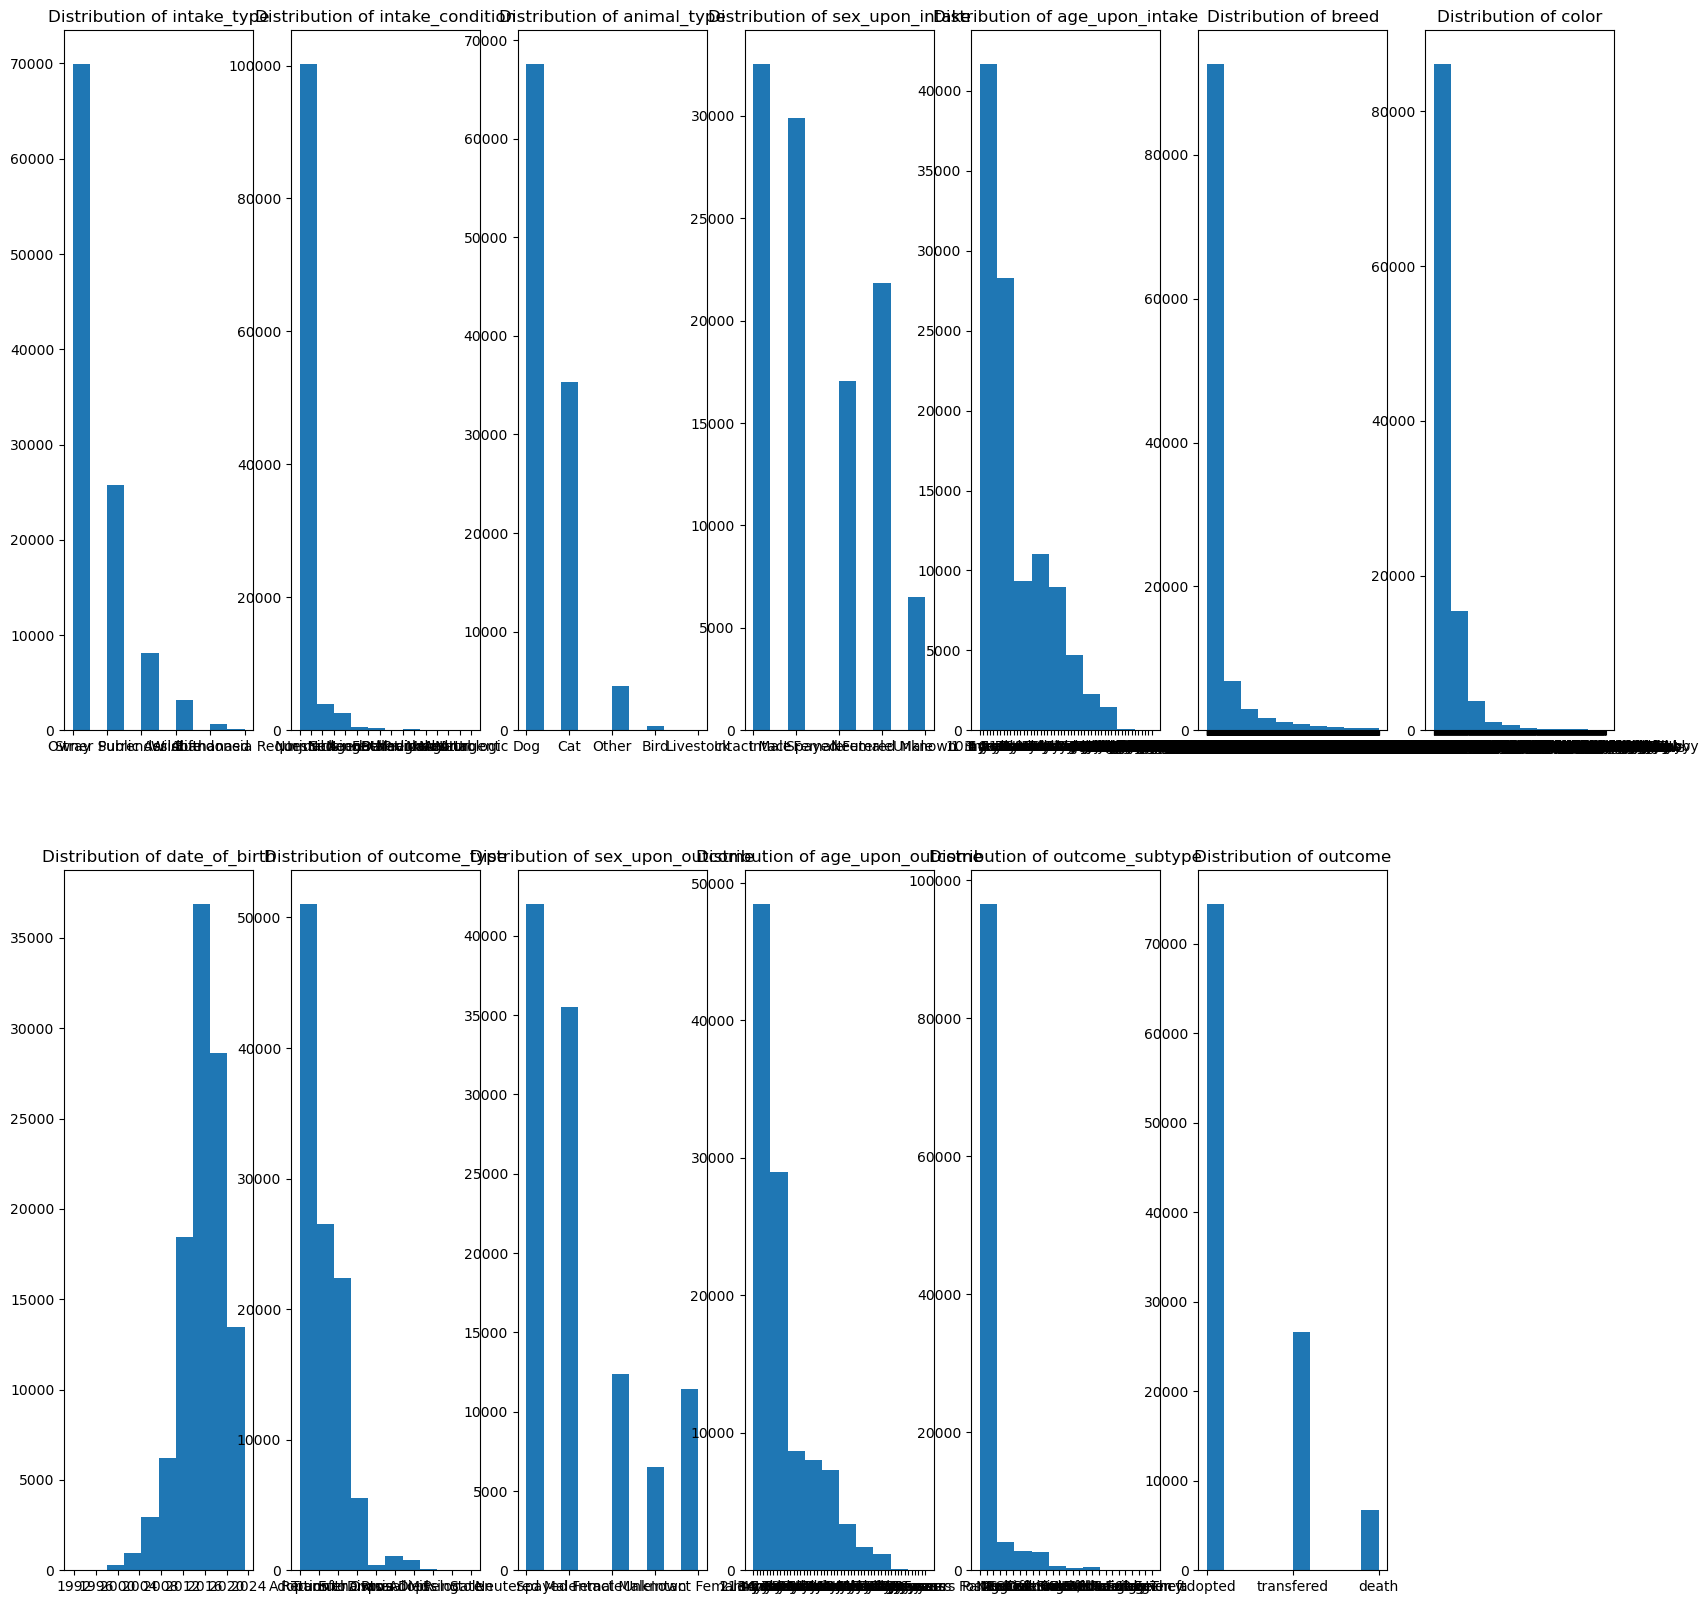

In [30]:
# cols = df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2) +1, plot_number)
    plt.title(f'Distribution of {col}')
    train[col].hist(bins=10)
    plt.grid(False)
plt.show()

### The age upon intake seems to be right skewed. Animal type could probably be put into 3 groups. Might be able to put color into 4-5 bins. intake condition could be 4-5 bins

In [31]:
def get_plot_outcomes(animals):
    '''
    display a plot showing the total amount of outcomes by type
    '''
    # create the bar plot
    animals.outcome.value_counts().plot.bar()
    # add a title
    plt.title('Adoption Accounts for 69% of Outcomes', size=20)
    # add x and y axis labels
    plt.xlabel('Outcome of Trip to Animal Shelter', size=18)
    plt.ylabel('Number of Animals with Outcome', size = 18)
    # increase the size of the xticks
    plt.xticks(size=16)
    # display the plot
    plt.show()

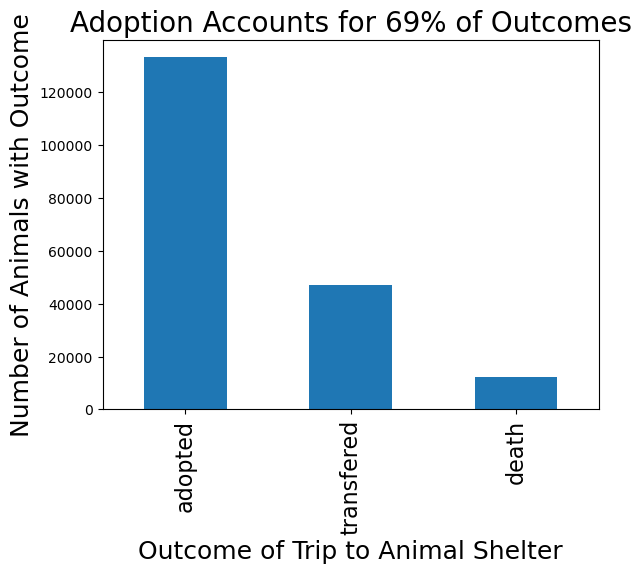

In [32]:
get_plot_outcomes(animals)

In [33]:
animals.adopted.mean()

0.6913518060777267

In [34]:
box_cols= [
 'intake_type_encoded',
 'intake_condition_encoded',
 'animal_type_encoded',
 'sex_upon_intake_encoded',
 'breed_encoded',
 'color_encoded',
 'sex_upon_outcome_encoded',
 'outcome_subtype_encoded', 'adopted', 'death', 'transfered']

In [35]:
# plt.figure(figsize=(20,10))
# for i, col in enumerate(box_cols):
#     # our plot numbers start at 1
#     plot_number = i+1
#     plt.subplot(2, round(len(cols) /2), plot_number)
#     plt.title(f'Distribution of {col}')
#     plt.grid(False)
#     sns.boxplot(data=train[col])
# plt.show()

# Bivariate Analysis

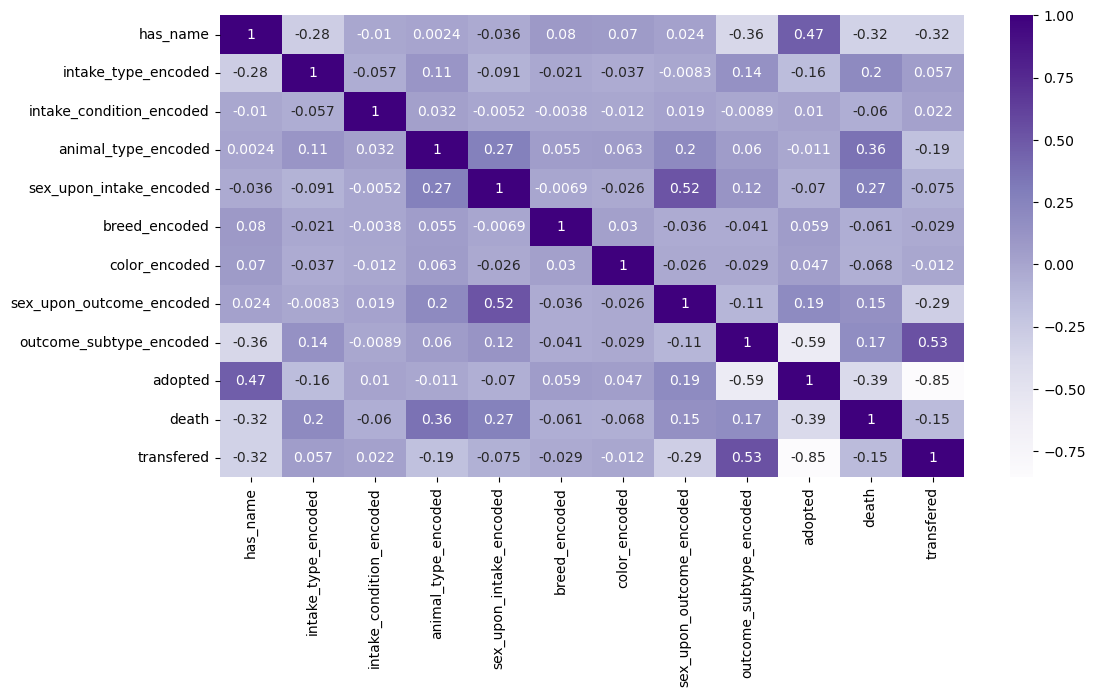

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='Purples', annot=True)
plt.show()

In [37]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    sample = df.sample(500)
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

<Figure size 2000x2000 with 0 Axes>

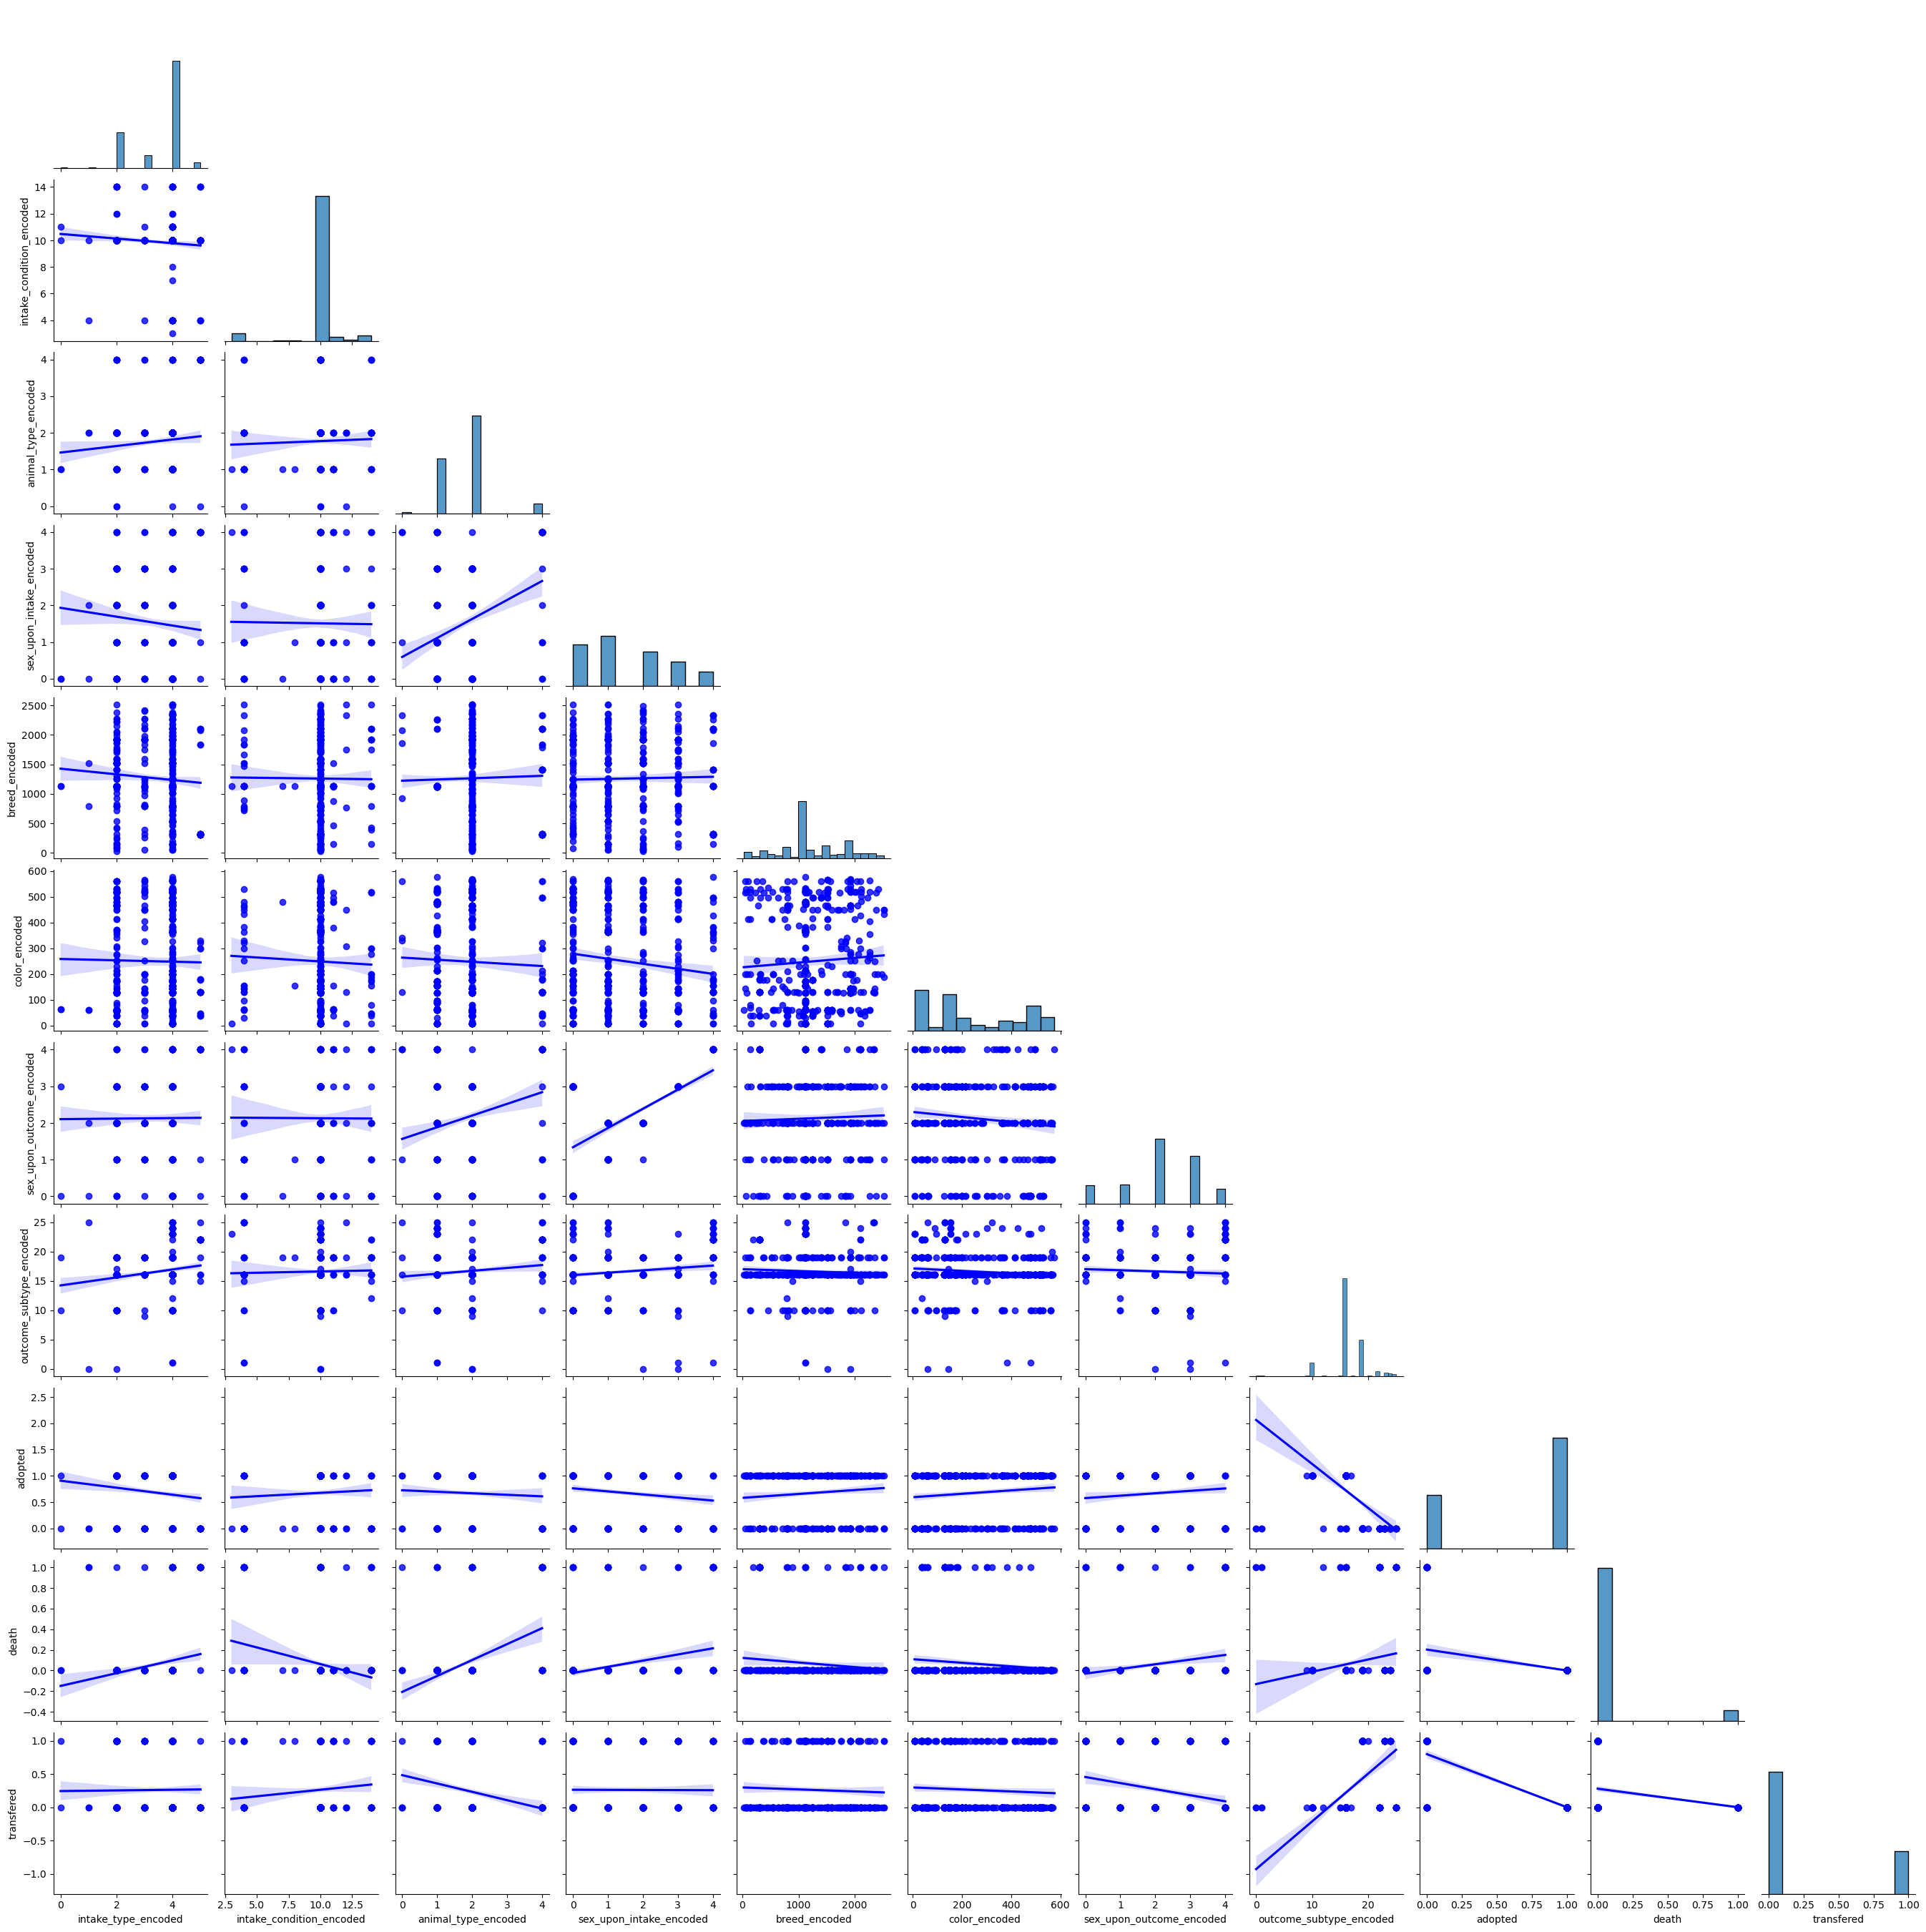

In [38]:
get_pairplot(train[box_cols])

### It looks like there might be some correlations to outcome with has_name, sex_upon_outcome, intake_type and animal_type

In [39]:
deaths = animals[animals.outcome == 'death']

In [40]:
deaths = deaths.set_index('datetime_out')

In [41]:
deaths[deaths.intake_type != 'Wildlife'].intake_condition.value_counts()

Normal        3261
Injured       1843
Sick          1086
Nursing        165
Aged            79
Other           30
Neonatal        17
Medical         16
Behavior        12
Feral            9
Pregnant         7
Med Urgent       3
Med Attn         2
Agonal           1
Name: intake_condition, dtype: int64

In [42]:
deaths[deaths.intake_type == 'Wildlife'].intake_condition.value_counts()

Normal      2968
Sick        1634
Injured     1017
Nursing       51
Neonatal      10
Medical        3
Other          2
Feral          1
Unknown        1
Name: intake_condition, dtype: int64

In [43]:
def get_plot_deaths_by_year(train):
    '''
    display a plot of total euthenization, deaths and disposal outcomes over time
    '''
    # create a subset of the data containing death outcomes
    deaths = train[train.outcome == 'death']
    # set the index to the date of the outcome
    deaths = deaths.set_index('datetime_out')
    # resample the data by year, and create the plot
    deaths.resample('Y').animal_id.count().plot()
    # add a title
    plt.title('Deaths by Year', size=16)
    # add axis labels
    plt.xlabel('Year', size=15)
    plt.ylabel('Number of Animal Deaths in Shelter', size=15)
    # display the plot
    plt.show()

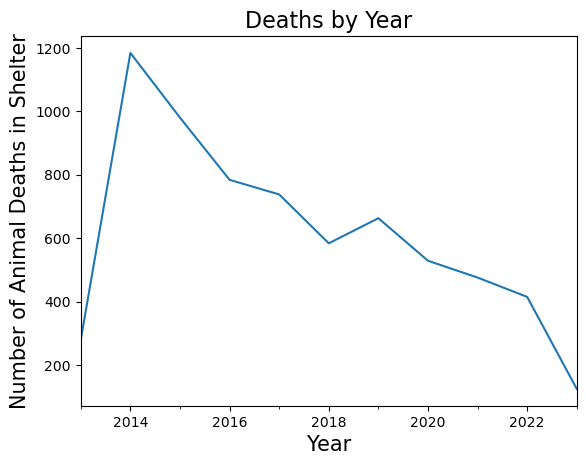

In [44]:
get_plot_deaths_by_year(train)

### The number of deaths per year appears to be going down

In [45]:
animals[animals.intake_type == 'Wildlife']

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,intake_condition_encoded,animal_type_encoded,sex_upon_intake_encoded,breed_encoded,color_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,adopted,death,transfered
12,A666101,2013-10-26 18:33:00,Payne in Austin (TX),Wildlife,Injured,Other,Unknown,0 years,Squirrel Mix,Gray/Brown,...,4,4,4,2338,311,4,16,0,1,0
13,A664830,2013-10-09 15:34:00,15043 Savannah Heights in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Brown/Black,...,14,4,4,2105,176,4,25,0,1,0
24,A665706,2013-10-21 18:06:00,43 Rainey St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,...,10,4,4,312,129,4,16,0,1,0
84,A665188,2013-10-14 22:25:00,2207 Pasadena Dr in Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Bat,Brown/Black,...,10,4,4,311,176,4,22,0,1,0
91,A664579,2013-10-05 14:55:00,8425 Adirondack Trail in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/White,...,14,4,4,2105,59,4,22,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192491,A776787,2018-07-19 09:09:00,2300 Townes Ln in Austin (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Gray/Black,...,14,4,4,2105,308,4,25,0,1,0
192511,A753119,2017-07-02 07:40:00,13408 Fitzhugh Rd in Austin (TX),Wildlife,Sick,Other,Unknown,5 months,Raccoon,Brown,...,14,4,4,2104,129,4,22,0,1,0
192559,A766079,2018-02-01 12:02:00,Willamette Dr in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/Gray,...,14,4,4,2105,47,4,15,0,1,0
192575,A807634,2019-10-27 16:21:00,430 Ridgewood in Austin (TX),Wildlife,Injured,Other,Unknown,3 years,Bat,Brown,...,4,4,4,311,129,4,16,0,1,0


In [46]:
animals[animals.intake_type == 'Wildlife'].outcome_type.value_counts()

Euthanasia         5095
Disposal            453
Died                139
Transfer             71
Relocate             15
Adoption              8
Missing               2
Return to Owner       2
Name: outcome_type, dtype: int64

In [47]:
((72 + 14 + 7 + 4) / 5789) * 100

1.6755916393159442

In [48]:
wildlife = animals[animals.intake_type == 'Wildlife']

In [49]:
def get_plot_wildlife_deaths(animals):
    '''
    display a plot showing the outcomes for animals with intake_type of 'Wildlife'
    '''
    # create a data subset of only animals with intake type of 'wildlife'
    wildlife = animals[animals.intake_type == 'Wildlife']
    # create a histogram of the data
    sns.histplot(data = wildlife, x='outcome')
    # add a title
    plt.title('Outcomes for Wildlife', size =18)
    # add axis labels
    plt.xlabel('Outcome of Trip to Animal Shelter', size= 16)
    plt.ylabel('Number of Animals', size=16)
    # change the tick size
    plt.xticks(size=15)
    plt.yticks(size=15)
    # display the plot
    plt.show()

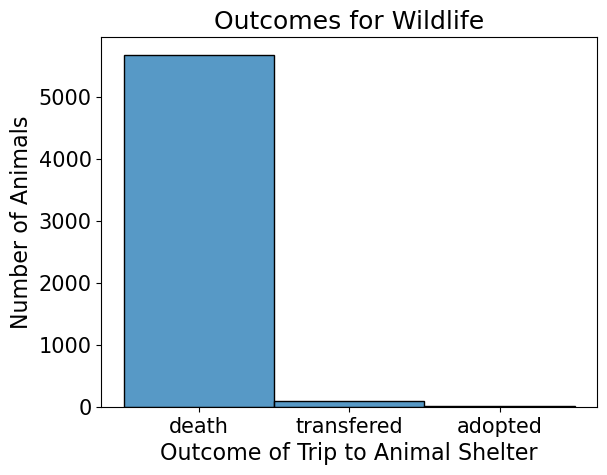

In [50]:
get_plot_wildlife_deaths(animals)

#### Looks like things don't turn out very well for wildlife that gets sent to the animal shelter, only 1.68 % survive a trip to the animal shelter

In [51]:
dogs = animals[animals.animal_type == 'Dog']
cats = animals[animals.animal_type == 'Cat']
other_animals = animals[(animals.animal_type == 'Other') | (animals.animal_type == 'Bird')
                        | (animals.animal_type == 'Livestock')]

In [52]:
dogs.outcome_type.value_counts()

Adoption           58120
Return to Owner    36789
Transfer           21570
Euthanasia          2295
Rto-Adopt           1637
Died                 366
Disposal              72
Missing               67
Stolen                10
Name: outcome_type, dtype: int64

In [53]:
dogs.intake_type.value_counts()

Stray                 77435
Owner Surrender       30226
Public Assist         12390
Abandoned               667
Euthanasia Request      208
Name: intake_type, dtype: int64

#### 77,000 stray dogs taken in, thats a lot

In [54]:
def get_plot_strays(animals):
    '''
    display a plot showing what type of animal is most likely taken in as strays
    '''
    sns.histplot(data=animals[animals.intake_type == 'Stray'], x='animal_type')
    plt.title('Dogs Are The Most Common Strays Taken In', size=16)
    plt.xlabel('Type of Stray Animal', size=15)
    plt.ylabel('Number of Animals', size=15)
    plt.xticks( size=14)
    plt.yticks(size=13)
    plt.show()

### Lets check out the relationship between having a name and outcome

In [55]:
named = train[train.has_name == True]
unnamed = train[train.has_name == False]

In [56]:
def get_plot_named_vs_unnamed(train):
    '''
    display 2 plots showing the difference in outcomes for animals with a name
    and animals without a name
    '''
    # create data subsets of animals with names and animals without names
    named = train[train.has_name == True].sort_values('outcome')
    unnamed = train[train.has_name == False].sort_values('outcome')
    # create a figure
    plt.figure(figsize=(12,8))
    # create a subplot
    plt.subplot(1,2,1)
    # create the first histogram
    sns.histplot(data = named, x='outcome')
    # add a title for the named plot
    plt.title('Named Animal Outcomes', size =18)
    # add axis labels
    plt.xlabel('Outcome of Trip to Animal Shelter', size= 16, loc='right')
    plt.ylabel('Number of Animals', size=18)
    # change the tick sizes
    plt.xticks(size=15)
    plt.yticks(size=15)
    # create the second subplot
    plt.subplot(1,2,2)
    # create the histogram for unnamed animal outcomes
    sns.histplot(data = unnamed, x='outcome')
    # add a title
    plt.title('Unnamed Animal Outcomes', size =18)
    # remove the axis labels for the second plot
    plt.xlabel('')
    plt.ylabel('')
    # change tick size
    plt.xticks(size=15)
    plt.yticks(size=15)
    # display the plots
    plt.show()

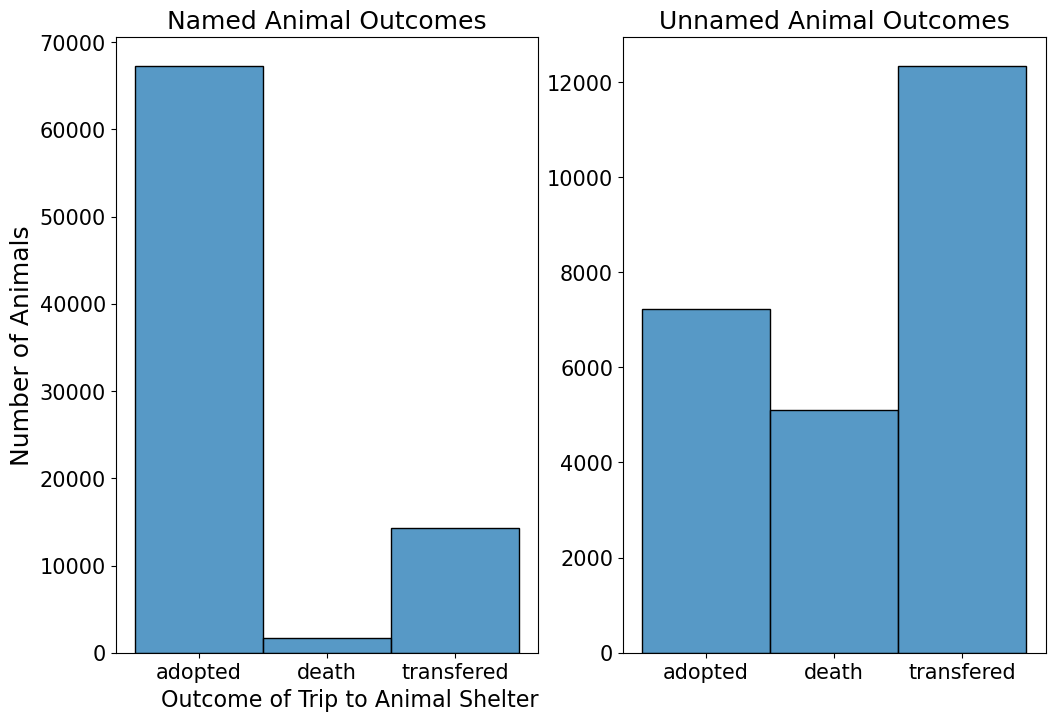

In [57]:
get_plot_named_vs_unnamed(train)

### Lets do a statistical test on named / outcome
- H$_0$: The outcome distributions are the same for named and unnamed animals
- H$_a$: The outcome distributions are different for named and unnamed animals
- α = 0.05
- This will be a categorical / categorical test, which will be a chi-squared test

In [58]:
observed = pd.crosstab(train['has_name'], train['outcome'])
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [59]:
def check_chi2_hypothesis(data, x, y, α=0.05):
    '''
    This function will check the provided x and y variables from the 
    provided dataset (data) for statistical relevence according 
    to a chi-sqared test (this is changable by entering the desired test as a kwarg)
    '''
    # run the requested statistical test on variables x and y from data
    observed = pd.crosstab(data[x], data[y])
    chi2, p, _, hypothetical = stats.chi2_contingency(observed)
    # if the resulting p-value is less than alpha, then reject the null hypothesis
    if p < α:
        # print results rejecting null hypothesis
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print(f"The correlation coefficient between \
{x} and {y} is {chi2:.2f} with a p-value of {p:.4f}")
        print('_______________________________________________________')
    # if p-value >= alpha, then we fail to reject the null hypothesis
    else:
        # print the results failing to reject the null hypothesis
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

In [60]:
check_chi2_hypothesis(train, 'has_name', 'outcome')

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that has_name and outcome are correlated.
The correlation coefficient between has_name and outcome is 26273.22 with a p-value of 0.0000
_______________________________________________________


#### We can conclude that having a name does have an effect on the outcome of the animal's trip to the animal shelter

### Are there higher amounts of intakes on different days?

In [61]:
intakes = train.set_index('datetime_in')
intakes['intake_day'] = intakes.index.day_of_week
train['intake_day'] = intakes.index.day_name()

In [62]:
# intakes.groupby('intake_day').animal_id.count().sort_values(
#     intakes.index.day_of_week).plot.bar()

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1565/4169386608.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  intakes.groupby('intake_day').animal_id.count().sort_values(


TypeError: unhashable type: 'Int64Index'

In [ ]:
intakes_day = train.groupby('intake_day').animal_id.count()

In [ ]:
intakes_day

In [67]:
train['outcome_day'] = train.datetime_out.dt.day_name()
train['weekday_num'] = train.datetime_out.dt.day_of_week

In [ ]:
train.head()

In [ ]:
train.groupby('weekday_num').count().outcome

In [ ]:
outcome_days['weekday_number'] = outcome_days.index.day_of_week

In [63]:
def get_plot_outcomes_by_day(train):
    '''
    display a plot showing the total number of outcomes per day of the week
    '''
    # create variables storing day of week and day name
    train['outcome_day'] = train.datetime_out.dt.day_name()
    train['weekday_num'] = train.datetime_out.dt.day_of_week
    # create the area plot
    train.groupby('outcome_day').outcome.value_counts().unstack().plot.area()
    # add a title
    plt.title('Outcome Types by Day of Week', size=20)
    # add axis labels
    plt.xlabel('Day of Week', size=16)
    plt.ylabel('Number of Animal Outcomes', size=16)
    # display the plot
    plt.show()

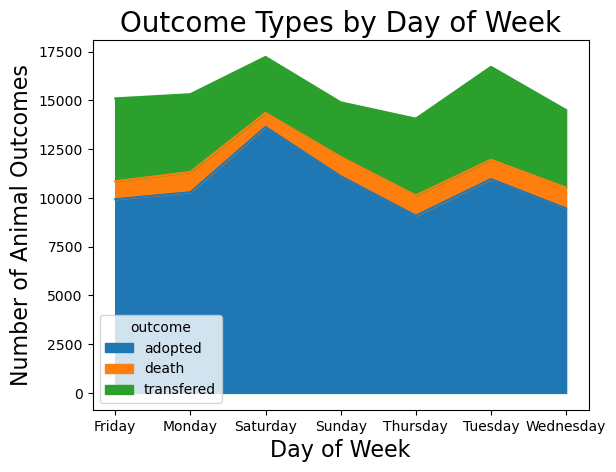

In [68]:
get_plot_outcomes_by_day(train)

In [5]:
train.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,...,sex_upon_intake_encoded,breed_encoded,color_encoded,sex_upon_outcome_encoded,outcome_subtype_encoded,adopted,death,transfered,outcome_day,weekday_num
110679,A733324,2016-08-20 12:30:00,11752 Von Quintus Dr in Austin (TX),Stray,Normal,Dog,Intact Male,1 month,Rat Terrier Mix,Black/White,...,1,2113,59,2,10,1,0,0,Tuesday,1
77632,A706156,2015-06-25 15:15:00,Farm To Market 620 N & Hudson Bend Rd in Austi...,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,...,1,1127,171,2,19,0,0,1,Thursday,3
176479,A852394,2022-03-02 12:56:00,1156 West Cesar Chavez Street in Austin (TX),Stray,Normal,Cat,Intact Female,10 months,Domestic Shorthair,Tortie,...,0,1126,480,3,19,0,0,1,Tuesday,1
80305,A703780,2015-05-28 18:01:00,1200 Mearns Meadow Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Chihuahua Shorthair/Dachshund,Black/Tan,...,0,818,56,3,16,1,0,0,Monday,0
121037,A779201,2018-08-27 12:52:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Black,...,3,1127,7,3,16,1,0,0,Sunday,6


In [81]:
train.groupby('outcome_day')['outcome','weekday_num'
                            ].value_counts()

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_5646/2998037942.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('outcome_day')['outcome','weekday_num'


outcome_day  outcome     weekday_num
Friday       adopted     4               9931
             transfered  4               4249
             death       4                922
Monday       adopted     0              10293
             transfered  0               3988
             death       0               1037
Saturday     adopted     5              13641
             transfered  5               2869
             death       5                719
Sunday       adopted     6              11115
             transfered  6               2802
             death       6                985
Thursday     adopted     3               9089
             transfered  3               3936
             death       3               1038
Tuesday      adopted     1              10967
             transfered  1               4762
             death       1                992
Wednesday    adopted     2               9461
             transfered  2               3978
             death       2               10

In [84]:
train.outcome_day

110679     Tuesday
77632     Thursday
176479     Tuesday
80305       Monday
121037      Sunday
            ...   
40850     Saturday
147311      Sunday
8794        Friday
150661    Thursday
48885     Saturday
Name: outcome_day, Length: 107839, dtype: object

In [91]:
train.adopted.sum()

74497

In [103]:
train.groupby('outcome_day','weekday_num')[
    'adopted','death','transfered'
].sum().astype(int)

ValueError: No axis named weekday_num for object type DataFrame

In [64]:
pd.DataFrame(train.groupby('outcome_day')['outcome','weekday_num'
                            ].value_counts()
            ).sort_values('weekday_num')

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_5646/1217556419.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(train.groupby('outcome_day')['outcome','weekday_num'


0
outcome_day outcome    weekday_num       
Monday      adopted    0            10293
            transfered 0             3988
            death      0             1037
Tuesday     death      1              992
            transfered 1             4762
            adopted    1            10967
Wednesday   death      2             1065
            adopted    2             9461
            transfered 2             3978
Thursday    death      3             1038
            transfered 3             3936
            adopted    3             9089
Friday      adopted    4             9931
            death      4              922
            transfered 4             4249
Saturday    death      5              719
            transfered 5             2869
            adopted    5            13641
Sunday      adopted    6            11115
            death      6              985
            transfered 6             2802

In [66]:
pd.DataFrame(train.groupby('outcome_day')['outcome','weekday_num'
                            ].value_counts()
            ).reset_index().sort_values('weekday_num')

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_5646/575139320.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(train.groupby('outcome_day')['outcome','weekday_num'


,outcome_day,outcome,weekday_num,0
3,Monday,adopted,0,10293
4,Monday,transfered,0,3988
5,Monday,death,0,1037
17,Tuesday,death,1,992
16,Tuesday,transfered,1,4762
15,Tuesday,adopted,1,10967
20,Wednesday,death,2,1065
18,Wednesday,adopted,2,9461
19,Wednesday,transfered,2,3978
14,Thursday,death,3,1038


In [79]:
outcomes_day = pd.DataFrame(train.groupby('outcome_day')['outcome','weekday_num'
                            ].value_counts()
            ).reset_index().sort_values('weekday_num'
                                       ).set_index('outcome_day'
                                                  ).drop(columns='weekday_num'
                                                        ).rename(columns={0:'vals'})
outcomes_day

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_5646/2796403968.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_day = pd.DataFrame(train.groupby('outcome_day')['outcome','weekday_num'


,outcome,vals
outcome_day,,
Monday,adopted,10293
Monday,transfered,3988
Monday,death,1037
Tuesday,death,992
Tuesday,transfered,4762
Tuesday,adopted,10967
Wednesday,death,1065
Wednesday,adopted,9461
Wednesday,transfered,3978


In [109]:
outcomes_day.explode('outcome')

,outcome,vals
outcome_day,,
Monday,adopted,10293
Monday,transfered,3988
Monday,death,1037
Tuesday,death,992
Tuesday,transfered,4762
Tuesday,adopted,10967
Wednesday,death,1065
Wednesday,adopted,9461
Wednesday,transfered,3978


In [80]:
pd.crosstab(index=outcomes_day.index, 
            columns=outcomes_day.outcome, 
            values=outcomes_day.vals)

ValueError: values cannot be used without an aggfunc.

In [32]:
train.groupby('outcome_day').outcome.value_counts().unstack()

outcome,adopted,death,transfered
outcome_day,,,
Friday,9931,922,4249
Monday,10293,1037,3988
Saturday,13641,719,2869
Sunday,11115,985,2802
Thursday,9089,1038,3936
Tuesday,10967,992,4762
Wednesday,9461,1065,3978


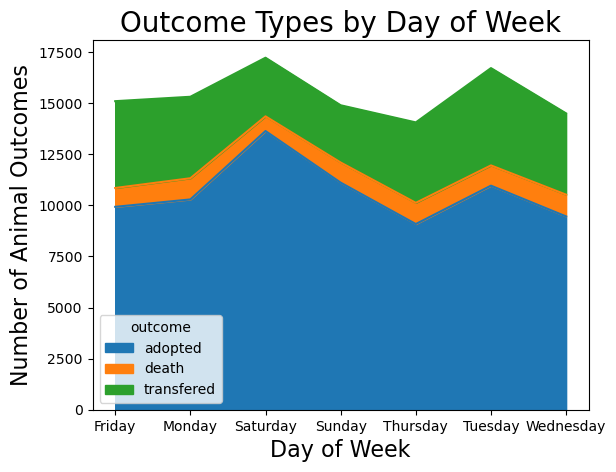

In [4]:
train['outcome_day'] = train.datetime_out.dt.day_name()
train['weekday_num'] = train.datetime_out.dt.day_of_week
# create the area plot
train.groupby('outcome_day').outcome.value_counts().unstack().plot.area()
# add a title
plt.title('Outcome Types by Day of Week', size=20)
# add axis labels
plt.xlabel('Day of Week', size=16)
plt.ylabel('Number of Animal Outcomes', size=16)
# display the plot
plt.show()

In [ ]:
train.groupby('outcome_day').outcome.value_counts().plot.bar()

In [ ]:
train.groupby('outcome_day').outcome.count().plot.bar(stacked=True)


In [ ]:
intakes.groupby('intake_type').resample('D').animal_id.count()

In [ ]:
intakes.groupby('intake_type').resample('M').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1)

In [65]:
def get_plot_intake_types(train):
    intakes = train.set_index('datetime_in')
    ax = intakes.groupby('intake_type').resample('M').size().unstack(0).apply(
        lambda row: row / row.sum() ,axis=1).plot.area(colormap='plasma')
    plt.title('Intake Type Proportion Over Time By Month', size=18)
    plt.ylabel('Proportion of Records in Bin', size=17)
    plt.xlabel('Month of Intake', size=17)
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

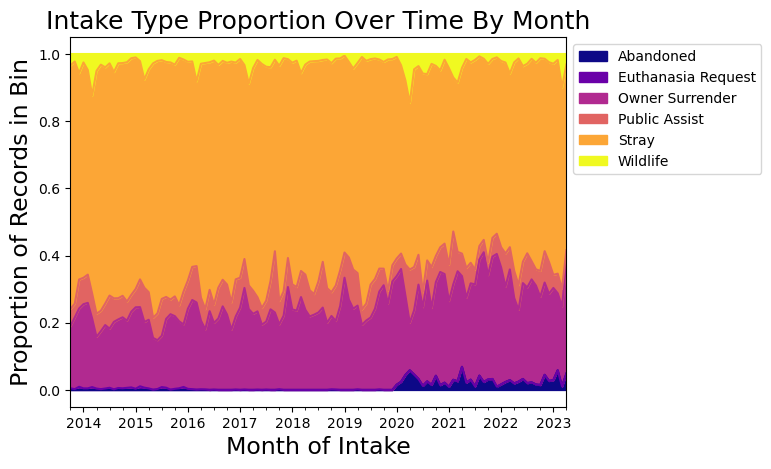

In [66]:
get_plot_intake_types(train)

In [ ]:
outcomes = train.set_index('datetime_out')

In [ ]:
outcomes.columns

In [ ]:
outcomes.groupby('outcome').resample('M').size().T.apply(
    lambda row: row / row.sum(), axis=1).plot.area()

In [ ]:
outcomes.groupby('outcome').resample('Y').size().unstack(1)

In [ ]:
outcomes.groupby('outcome_type').resample('Y').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1)

In [ ]:
ax = outcomes.groupby('outcome_type').resample('Y').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1).plot.area(
    title='Outcome type Proportion Over Time By Month',
    ylabel='Proportion of Records in Bin',
    colormap='plasma'
)
ax.legend(
         bbox_to_anchor=(1,1))

In [ ]:
def get_plot_outcomes_by_sex(train):
    '''
    display a plot showing the difference in outcomes based on sex_upon_outcome
    '''
    # create the plot
    sns.histplot(data=train, x='outcome', hue='sex_upon_outcome', stat='count')
    # add a title
    plt.title('Outcome Types by Sex Upon Outcome', size=20)
    # add axis labels
    plt.xlabel('Outcome', size=16)
    plt.ylabel('Number of Animal Outcomes', size=16)
    # display the plot
    plt.show()

In [ ]:
get_plot_outcomes_by_sex(train)

In [ ]:
check_chi2_hypothesis(train, 'outcome', 'sex_upon_outcome_encoded')

### We can conclude that outcome is dependent on the sex upon outcome